In [3]:
''' 
-- Starting from scratch -- 
Steps of what you have to do:
1) Create a matrix of numbers, with columns being SITES (or nuceotides) and rows being STRAINS (or samples)
2) Find the mean of them using np.mean() and subtract the mean for each column from each number in the column (Which effectively centers the data)
3) Find the frquency of each letter (with everything not agct put together into one number (so 0 1 2 3 and then 4 for N etc.))
4) Substitute the normalized matrix(from step two) with the matrix that has the frequncy divided for each one (so we fix the variance for all of them)
This should normalize the matrix and this plugged into PCA is actually reducing dimensions. 
'''

' \n-- Starting from scratch -- \nSteps of what you have to do:\n1) Create a matrix of numbers, with columns being SITES (or nuceotides) and rows being STRAINS (or samples)\n2) Find the mean of them using np.mean() and subtract the mean for each column from each number in the column (Which effectively centers the data)\n3) Find the frquency of each letter (with everything not agct put together into one number (so 0 1 2 3 and then 4 for N etc.))\n4) Substitute the normalized matrix(from step two) with the matrix that has the frequncy divided for each one (so we fix the variance for all of them)\nThis should normalize the matrix and this plugged into PCA is actually reducing dimensions. \n'

# Creating the Tree in Altair

In [4]:
import altair as alt
from augur.utils import json_to_tree
import json
import pandas as pd

In [5]:
# Import modules
with open('Data/zika_tree.json') as fh:
    json_tree_handle = json.load(fh)
#json_tree_handle = json.loads(requests.get("http://data.nextstrain.org/zika_tree.json").text)
# Download tree JSON file used by auspice. Despite its filename extension, the data are compressed.
#http = urllib3.PoolManager()
# = http.request('GET', "")


In [6]:
tree = json_to_tree(json_tree_handle)

In [7]:
tree

Clade(branch_length=0, clade=940, name='NODE_0000520', numdate=2007.1438944876675, strain='NODE_0000520', yvalue=510.91459311393555)

In [8]:
node_data = [
    {
        "strain": node.name,
        "date": node.attr["num_date"],
        "y": node.yvalue,
        "region": node.attr["region"],
        "country": node.attr["country"],
        "parent_date": node.parent is not None and node.parent.attr["num_date"] or node.attr["num_date"],
        "parent_y": node.parent is not None and node.parent.yvalue or node.yvalue
    }
    for node in tree.find_clades(terminal=True)
]

In [9]:
node_data[10]

{'strain': 'V20366',
 'date': 2018.7748117727583,
 'y': 507,
 'region': 'south_asia',
 'country': 'india',
 'parent_date': 2018.510007605652,
 'parent_y': 507.5}

In [10]:
node_df = pd.DataFrame(node_data)

In [11]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,516.50,southeast_asia,THA/PLCal_ZV/2013,517
1,thailand,2016.665298,2010.921473,516.50,southeast_asia,SI_BKK01,516
2,thailand,2015.043806,2010.006479,514.25,southeast_asia,SV0010/15,515
3,thailand,2016.919918,2011.367398,513.50,southeast_asia,DMSc05684_16,514
4,thailand,2013.722793,2011.367398,513.50,southeast_asia,SK403/13AS,513


In [12]:
node_df["y"] = node_df["y"].max() - node_df["y"]

In [13]:
node_df["parent_y"] = node_df["parent_y"].max() - node_df["parent_y"]

In [14]:
node_df.shape

(517, 7)

In [15]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,0.00,southeast_asia,THA/PLCal_ZV/2013,0
1,thailand,2016.665298,2010.921473,0.00,southeast_asia,SI_BKK01,1
2,thailand,2015.043806,2010.006479,2.25,southeast_asia,SV0010/15,2
3,thailand,2016.919918,2011.367398,3.00,southeast_asia,DMSc05684_16,3
4,thailand,2013.722793,2011.367398,3.00,southeast_asia,SK403/13AS,4


In [16]:
node_df["region"].unique()

array(['southeast_asia', 'south_asia', 'oceania', 'china',
       'north_america', 'south_america', 'japan_korea'], dtype=object)

# Step 1: Creating a matrix of numbers with columns being sites and rows being strains 

In [17]:
#work on making this work
import pandas as pd
import numpy as np
from Bio import SeqIO
strains = []
genomes = []
for record in SeqIO.parse('C:/Users/srava/BedfordProjects/zika/results/aligned.fasta', "fasta"):
    strains.append(str(record.id))
    genomes.append(str(record.seq))

In [18]:
len(strains)

519

In [19]:
strains[:5]

['DOM/2016/MA_WGS16_024',
 'DOM/2016/BB_0180',
 'DOM/2016/BB_0115',
 'DOM/2016/BB_0208',
 'DOM/2016/MA_WGS16_007']

In [20]:
print(len(genomes))

519


In [21]:
i = 0
for i in range(0,len(genomes)):
    genomes[i] = list(genomes[i].replace('A','1').replace('G','2').replace('C', '3').replace('T','4').replace('N','5')
               .replace('R','5').replace('S','5').replace('M', '5').replace('Y', '5').replace('W','5')
               .replace('K','5').replace('B','5').replace('D','5'))
    genomes[i] = [float(j) for j in genomes[i]]
genomes_df = pd.DataFrame(genomes)
genomes_df.columns = ["Site " + str(k) for k in range(0,len(genomes[i]))]

In [22]:
genomes_df.head()

,Site 0,Site 1,Site 2,Site 3,Site 4,Site 5,Site 6,Site 7,Site 8,Site 9,...,Site 10759,Site 10760,Site 10761,Site 10762,Site 10763,Site 10764,Site 10765,Site 10766,Site 10767,Site 10768
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,2.0,1.0,1.0,4.0,3.0,1.0,2.0,1.0,3.0,4.0,...,3.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0
2,2.0,1.0,1.0,4.0,3.0,1.0,2.0,1.0,3.0,4.0,...,3.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0
3,5.0,5.0,1.0,4.0,3.0,1.0,2.0,1.0,3.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


## Step 2: Find the mean of each column using np.mean() and subtract this from each number in the column (x - Mu)

In [23]:
genomes_numpy = np.array(genomes)
genomes_numpy1 = np.array(genomes)

In [24]:
genomes_numpy

array([[5., 5., 5., ..., 5., 5., 5.],
       [2., 1., 1., ..., 3., 2., 2.],
       [2., 1., 1., ..., 3., 2., 2.],
       ...,
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.]])

In [25]:
mean_numpy = np.mean(genomes_numpy, axis=0,dtype=np.float64)
mean_numpy

array([3.92870906, 3.49903661, 3.50289017, ..., 4.63776493, 4.45086705,
       4.47976879])

In [26]:
len(genomes[0])
mean_numpy.shape

(10769,)

In [27]:
i = 0
for i in range(0,len(genomes[i])):
    for j in range(0,len(genomes)):
        genomes_numpy[j,i] = genomes_numpy[j,i] - mean_numpy[i]


In [28]:
genomes_df = pd.DataFrame(genomes_numpy)

In [29]:
genomes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,10759,10760,10761,10762,10763,10764,10765,10766,10767,10768
0,1.071291,1.500963,1.49711,0.414258,0.836224,1.676301,1.262042,1.737958,0.884393,0.450867,...,0.44316,0.653179,0.624277,0.404624,0.595376,0.578035,0.373796,0.362235,0.549133,0.520231
1,-1.928709,-2.499037,-2.50289,-0.585742,-1.163776,-2.323699,-1.737958,-2.262042,-1.115607,-0.549133,...,-1.55684,-2.346821,-2.375723,-1.595376,-2.404624,-2.421965,-1.626204,-1.637765,-2.450867,-2.479769
2,-1.928709,-2.499037,-2.50289,-0.585742,-1.163776,-2.323699,-1.737958,-2.262042,-1.115607,-0.549133,...,-1.55684,-2.346821,-2.375723,-1.595376,-2.404624,-2.421965,-1.626204,-1.637765,-2.450867,-2.479769
3,1.071291,1.500963,-2.50289,-0.585742,-1.163776,-2.323699,-1.737958,-2.262042,-1.115607,-0.549133,...,0.44316,0.653179,0.624277,0.404624,0.595376,0.578035,0.373796,0.362235,0.549133,0.520231
4,1.071291,1.500963,1.49711,0.414258,0.836224,1.676301,1.262042,1.737958,0.884393,0.450867,...,0.44316,0.653179,0.624277,0.404624,0.595376,0.578035,0.373796,0.362235,0.549133,0.520231


In [30]:
from sklearn.decomposition import PCA

#performing PCA on my pandas dataframe 
pca = PCA(n_components=10,svd_solver='full') #can specify n, since with no prior knowledge, I use None
principalComponents = pca.fit_transform(genomes_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component " + str(i) for i in range(1,11)])

In [31]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-18.701136,-2.695925,-4.643543,0.732908,-1.023498,4.946784,0.466124,-4.214987,-4.574138,-6.908700
1,-27.954344,13.316649,4.709408,1.347644,1.842175,-6.703103,2.452967,4.575572,1.766834,4.218038
2,-27.967235,13.318665,4.733974,1.353565,1.781710,-6.682366,2.431725,4.545631,1.737506,4.201932
3,-27.314532,12.392770,4.194193,1.200291,1.420500,-5.328784,1.881091,3.473560,1.321899,3.136685
4,0.376124,-27.418253,-19.793464,10.785468,-6.151841,9.539998,0.651334,1.647239,-4.167116,-5.726275


# Merging Strain and PCA

In [32]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t')

In [33]:
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']

In [34]:
result_strains = pd.merge(strains_df,metadata_df, on='strain')

In [35]:
finalDf = pd.concat([principalDf, result_strains[['region','country','strain']]], axis = 1)

In [36]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [37]:
merged_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,region,country_x,strain,country_y,date,parent_date,parent_y,y
0,-18.701136,-2.695925,-4.643543,0.732908,-1.023498,4.946784,0.466124,-4.214987,-4.574138,-6.908700,north_america,dominican_republic,DOM/2016/MA_WGS16_024,dominican_republic,2016.517454,2016.177960,202.0,202
1,-27.954344,13.316649,4.709408,1.347644,1.842175,-6.703103,2.452967,4.575572,1.766834,4.218038,north_america,dominican_republic,DOM/2016/BB_0180,dominican_republic,2016.298426,2015.782991,188.0,188
2,-27.967235,13.318665,4.733974,1.353565,1.781710,-6.682366,2.431725,4.545631,1.737506,4.201932,north_america,dominican_republic,DOM/2016/BB_0115,dominican_republic,2016.279261,2015.738263,171.5,172
3,-27.314532,12.392770,4.194193,1.200291,1.420500,-5.328784,1.881091,3.473560,1.321899,3.136685,north_america,dominican_republic,DOM/2016/BB_0208,dominican_republic,2016.303901,2016.145963,205.0,205
4,0.376124,-27.418253,-19.793464,10.785468,-6.151841,9.539998,0.651334,1.647239,-4.167116,-5.726275,north_america,dominican_republic,DOM/2016/MA_WGS16_007,dominican_republic,2016.358658,2016.145963,205.0,206


In [38]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

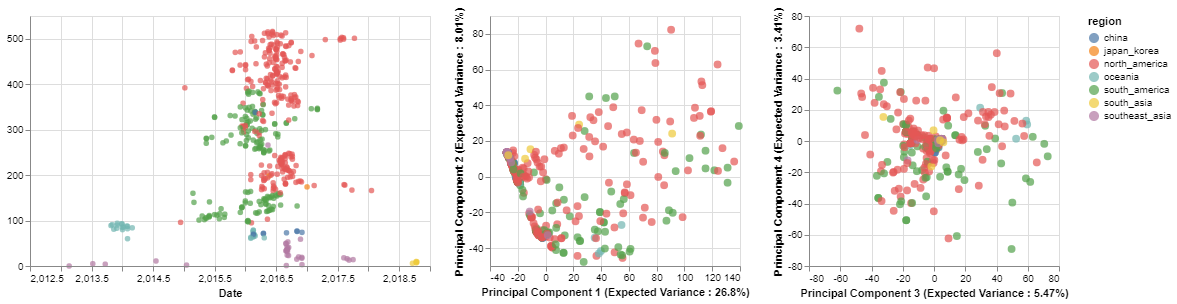

In [39]:
import altair as alt
base = alt.Chart(merged_df)
brush = alt.selection(type='interval', resolve='global')
tree_name = base.mark_circle().encode(
    x=alt.X(
        "date:Q",
        scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2)),
        title="Date"
    ),
    y=alt.Y(
        "y:Q",
        title=""
    ),
    color=alt.condition(brush, 'region:N', alt.ColorValue('gray')),
    #color="region:N",
    tooltip=["strain:N", "region:N", "date:Q"]
).add_selection(brush).properties(width=400,height=250)

#brush = alt.selection(type='interval', resolve='global')
#link the charts
pc1 = base.mark_circle(size=60).encode(
    x=alt.X('principal component 1',title='Principal Component 1 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[0]*100,2)) + ")"),
    y=alt.X('principal component 2',title='Principal Component 2 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[1]*100,2)) + ")"),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

pc34 = base.mark_circle(size=60).encode(
    x=alt.X('principal component 3',title='Principal Component 3 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[2]*100,2)) + ")"),
    y=alt.X('principal component 4',title='Principal Component 4 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[3]*100,2)) + ")"),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
#make region clickable
tree_name|pc1|pc34


## Step Three: Find the frequency of each letter and divide each number in each column by that number

In [40]:
def scale_column(column):
    count_A = len((np.where(column < 1.1))[0])
    count_G = len((np.where((column < 2.1) & (column > 1.1))[0]))
    count_C = len((np.where((column < 3.1) & (column > 2.1))[0]))
    count_T = len((np.where((column < 4.1) & (column > 3.1))[0]))
    count_N = len((np.where((column < 5.1) & (column > 4.1))[0]))
    return [count_A/float(len(column)), count_G/float(len(column)), count_C/float(len(column)), count_T/float(len(column)), count_N/float(len(column))]

In [41]:
import math
def return_column(genome_org, genome_column,counts):
    for i in range(0,len(genome_column)):
        if(genome_org[i] == 1.0):
            genome_column[i] = genome_column[i] / math.sqrt(float(math.fabs(counts[0])) * (1 - float(math.fabs(counts[0])))) 
        if(genome_org[i] == 2.0):
            genome_column[i] = genome_column[i] / math.sqrt(float(math.fabs(counts[1])) * (1 - float(math.fabs(counts[1])))) 
        if(genome_org[i] == 3.0):
            genome_column[i] = genome_column[i] / math.sqrt(float(math.fabs(counts[2])) * (1 - float(math.fabs(counts[2])))) 
        if(genome_org[i] == 4.0):
            genome_column[i] = genome_column[i] / math.sqrt(float(math.fabs(counts[3])) * (1 - float(math.fabs(counts[3]))))  
        if(genome_org[i] == 5.0):
            genome_column[i] = genome_column[i] / math.sqrt(float(math.fabs(counts[4])) * (1 - float(math.fabs(counts[4])))) 
    return genome_column

In [42]:
genomes_numpy

array([[ 1.07129094,  1.50096339,  1.49710983, ...,  0.36223507,
         0.54913295,  0.52023121],
       [-1.92870906, -2.49903661, -2.50289017, ..., -1.63776493,
        -2.45086705, -2.47976879],
       [-1.92870906, -2.49903661, -2.50289017, ..., -1.63776493,
        -2.45086705, -2.47976879],
       ...,
       [ 1.07129094,  1.50096339,  1.49710983, ...,  0.36223507,
         0.54913295,  0.52023121],
       [ 1.07129094,  1.50096339,  1.49710983, ...,  0.36223507,
         0.54913295,  0.52023121],
       [ 1.07129094,  1.50096339,  1.49710983, ...,  0.36223507,
         0.54913295,  0.52023121]])

In [43]:
q = 0
for q in range(0,len(genomes[q])):
    counts = scale_column(genomes_numpy1[:,q])
    genomes_numpy[:,q] = return_column(genomes_numpy1[:,q],genomes_numpy[:,q],counts)

In [44]:
df = pd.DataFrame(genomes_numpy)

In [45]:
from sklearn.decomposition import PCA

#performing PCA on my pandas dataframe 
pca = PCA(n_components=10,svd_solver='full') #can specify n, since with no prior knowledge, I use None
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component " + str(i) for i in range(1,11)])

In [46]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-71.062208,10.301595,-6.094765,-1.956064,5.286970,1.215671,4.289157,1.491331,-3.654120,1.137873
1,-81.086360,22.498641,6.060886,9.786373,0.268714,-11.657046,14.133656,-9.754941,-11.976997,-9.643675
2,-81.214990,22.731260,6.707962,11.306462,-0.621210,-12.798462,13.926060,-9.820343,-11.435373,-8.012753
3,-79.540710,22.295288,5.011037,10.244133,-0.701505,-11.084964,12.207707,-8.136109,-9.901459,-8.078433
4,-40.493432,0.525493,-42.564740,-6.391182,-0.057135,20.335041,-11.305920,27.302156,26.184438,33.601364


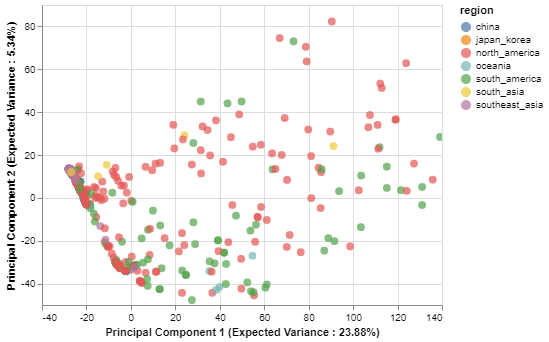

In [47]:
import altair as alt
brush = alt.selection(type='interval', resolve='global')
#link the charts
alt.Chart(finalDf).mark_circle(size=60).encode(
    x=alt.X('principal component 1',title='Principal Component 1 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[0]*100,2)) + ")"),
    y=alt.X('principal component 2',title='Principal Component 2 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[1]*100,2)) + ")"),
    color='region',
    tooltip=['strain', 'region']
).interactive()
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

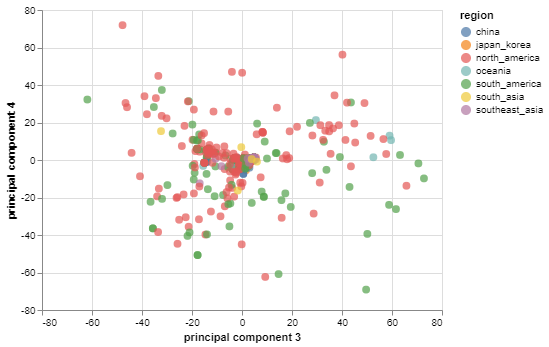

In [48]:
import altair as alt

alt.Chart(finalDf).mark_circle(size=60).encode(
    x='principal component 3',
    y='principal component 4',
    color='region',
    tooltip=['strain', 'region']
).interactive()

# Linking the Tree with the two other PCA Plots

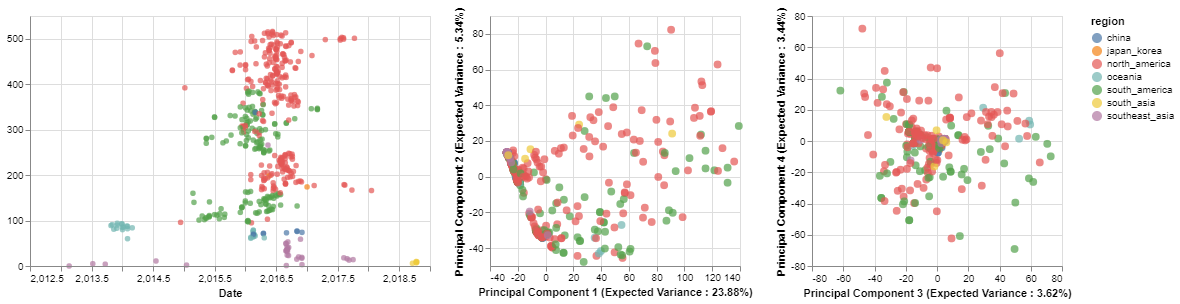

In [49]:
import altair as alt
base = alt.Chart(merged_df)
brush = alt.selection(type='interval', resolve='global')
tree_name = base.mark_circle().encode(
    x=alt.X(
        "date:Q",
        scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2)),
        title="Date"
    ),
    y=alt.Y(
        "y:Q",
        title=""
    ),
    color=alt.condition(brush, 'region:N', alt.ColorValue('gray')),
    #color="region:N",
    tooltip=["strain:N", "region:N", "date:Q"]
).add_selection(brush).properties(width=400,height=250)

#brush = alt.selection(type='interval', resolve='global')
#link the charts
pc1 = base.mark_circle(size=60).encode(
    x=alt.X('principal component 1',title='Principal Component 1 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[0]*100,2)) + ")"),
    y=alt.X('principal component 2',title='Principal Component 2 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[1]*100,2)) + ")"),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

pc34 = base.mark_circle(size=60).encode(
    x=alt.X('principal component 3',title='Principal Component 3 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[2]*100,2)) + ")"),
    y=alt.X('principal component 4',title='Principal Component 4 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[3]*100,2)) + ")"),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

tree_name|pc1|pc34


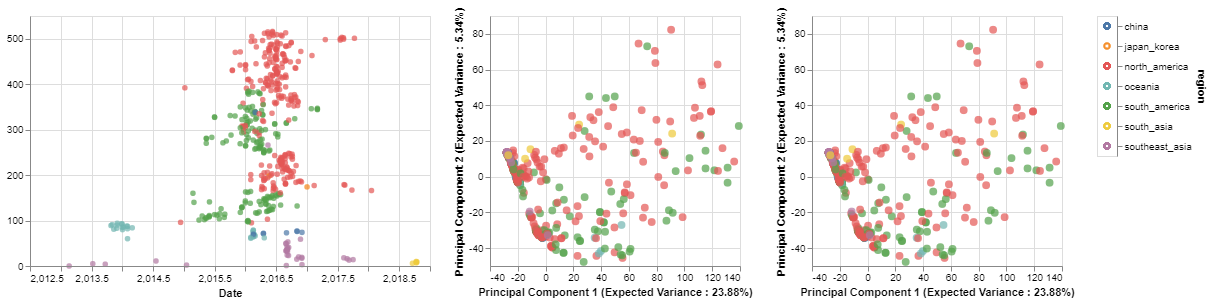

In [51]:
import altair as alt

#brush = alt.selection(type='interval', resolve='global')
base = alt.Chart(merged_df)
selection = alt.selection_multi(fields=['region'])

color = alt.condition(selection,
                      alt.Color('region:N', legend=None),
                      alt.value('lightgray'))

pc1 = base.mark_circle(size=60).encode(
    x=alt.X('principal component 1',title='Principal Component 1 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[0]*100,2)) + ")"),
    y=alt.X('principal component 2',title='Principal Component 2 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[1]*100,2)) + ")"),
    color=color,
    tooltip=['strain', 'region']
).add_selection(
    selection
).properties(
    width=250,
    height=250
)

pc2 = base.mark_circle(size=60).encode(
    x=alt.X('principal component 1',title='Principal Component 1 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[0]*100,2)) + ")"),
    y=alt.X('principal component 2',title='Principal Component 2 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[1]*100,2)) + ")"),
    color=color,
    tooltip=['strain', 'region']
).add_selection(
    selection
).properties(
    width=250,
    height=250
)
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)
tree_name = base.mark_circle().encode(
    x=alt.X(
        "date:Q",
        scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2)),
        title="Date"
    ),
    y=alt.Y(
        "y:Q",
        title=""
    ),
    color=color,
    tooltip=["strain:N", "region:N", "date:Q"]
).add_selection(selection).properties(width=400,height=250)

legend = base.mark_point().encode(
    y=alt.Y('region:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)
#make region clickable
clickablePCAChart = tree_name|pc1|pc2|legend
clickablePCAChart.save('../Docs/PCAScaledClickable.html')
clickablePCAChart
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)